In [ ]:
# 유임 승차비율이 가장 높은 역을 찾으세요 + 이용고객이 가장 많은 역을 찾으세요

# 유임 승차 비율 컬럼을 추가 -> 비교 검색

In [16]:
import csv

with open('data-files/subwayfee.csv', 'rt', encoding="utf-8") as f:
    subwayfee_reader = csv.reader(f)

    titles = next(subwayfee_reader)
    titles = titles[1:-1] + ['유임승차비율', "승차고객", "하차고객", "총고객"]

    subwayfee = []
    for row in subwayfee_reader:
        filtered_row = row[1:-1] # 첫 번째 컬럼과 마지막 컬럼 제거
        filtered_row[3:] = map(lambda v: int(v.replace(",", "")), filtered_row[3:])
        paid_ratio = filtered_row[3] / (filtered_row[3] + filtered_row[5])
        filtered_row.append( paid_ratio if filtered_row[3] >= 10000 else 0 ) # 유임승차비율 추가
        filtered_row.append(filtered_row[3] + filtered_row[5]) # 승차 인원 추가
        filtered_row.append(filtered_row[4] + filtered_row[6]) # 하차 인원 추가
        filtered_row.append(sum(filtered_row[3:7])) # 총 인원 추가
        subwayfee.append(filtered_row)

In [14]:
# 단일 값 리스트 정렬 코드 테스트
numbers = [15, 6, 22, 11, 4, 31, 29]
print(numbers)
numbers.sort(reverse=True)
print(numbers)

# 복합 값 리스트 정렬 코드 테스트
numbers2 = [[15, 4], [6, 32], [22, 19]]
numbers2.sort()
print(numbers2)
numbers2.sort(key=lambda v: v[1]) # 각 복합 값의 1번째 데이터를 기준으로 정렬
print(numbers2)

[15, 6, 22, 11, 4, 31, 29]
[31, 29, 22, 15, 11, 6, 4]
[[6, 32], [15, 4], [22, 19]]
[[15, 4], [22, 19], [6, 32]]


In [18]:
subwayfee.sort(key=lambda v: v[7], reverse=True)
print( subwayfee[0:5] )
print( subwayfee[-1])

[['공항철도 1호선', '4203', '홍대입구', 371643, 370878, 17770, 16276, 0.954367214242976, 389413, 387154, 776567], ['2호선', '0239', '홍대입구', 1826125, 1942785, 90954, 87709, 0.9525559457904448, 1917079, 2030494, 3947573], ['경부선', '1001', '서울역', 256846, 75524, 13548, 2968, 0.9498953379143028, 270394, 78492, 348886], ['공항철도 1호선', '4206', '마곡나루(서울식물원)', 253684, 245482, 14782, 15533, 0.9449390239359919, 268466, 261015, 529481], ['6호선', '2632', '한강진', 259789, 302118, 15605, 15628, 0.9433357298997074, 275394, 317746, 593140]]
['6호선', '2649', '신내', 2, 0, 1, 0, 0, 3, 0, 3]


In [19]:
filtered_subwayfee = filter(lambda row: row[7] > 0, subwayfee)

In [21]:
list(filtered_subwayfee)[-5:]

[['우이신설선',
  '4707',
  '삼양사거리',
  34687,
  34309,
  33621,
  34120,
  0.5078028927797622,
  68308,
  68429,
  136737],
 ['중앙선',
  '1219',
  '용문',
  26624,
  27255,
  27936,
  27947,
  0.4879765395894428,
  54560,
  55202,
  109762],
 ['1호선',
  '0157',
  '제기동',
  220559,
  212160,
  259286,
  277782,
  0.45964634413195926,
  479845,
  489942,
  969787],
 ['1호선',
  '0159',
  '동묘앞',
  122760,
  130605,
  146547,
  149164,
  0.4558366473949805,
  269307,
  279769,
  549076],
 ['경원선',
  '1916',
  '소요산',
  29466,
  23236,
  46961,
  43019,
  0.38554437567875227,
  76427,
  66255,
  142682]]

In [23]:
# 총고객 기준 내림차순 정렬
subwayfee.sort(key=lambda row: row[-1], reverse=True)

In [26]:
[ (row[2], row[-1]) for row in subwayfee[:10] ]

[('강남', 4467590),
 ('잠실(송파구청)', 4374772),
 ('홍대입구', 3947573),
 ('구로디지털단지', 3137894),
 ('신림', 3068158),
 ('삼성(무역센터)', 2953408),
 ('역삼', 2865288),
 ('서울역', 2818813),
 ('신도림', 2754760),
 ('선릉', 2752869)]

In [28]:
[ (row[0], row[2], row[-1]) for row in subwayfee[-10:] ]

[('경의선', '운천', 271),
 ('3호선', '충무로', 48),
 ('6호선', '연신내', 28),
 ('분당선', '복정', 22),
 ('일산선', '지축', 15),
 ('경원선', '창동', 9),
 ('6호선', '신내', 3),
 ('경의선', '김포공항', 2),
 ('경의선', '계양', 2),
 ('경의선', '검암', 2)]

In [31]:
# 전처리 -> 데이터 구성
# 1. 년-월 컬럼, 처리일자 컬럼 제거
# 2. 숫자변환
import csv 

with open("data-files/subwaytime.csv", "rt", encoding="utf-8") as f:
    time_reader = csv.reader(f)

    # [ [], [], ... ]
    time_data = []
    for row in time_reader:
        r = row[1:4] + [ int(v.replace(",", "")) for v in row[4:-1] ]
        time_data.append(r)

In [ ]:
# 문제 1. 출근 시간대(7 ~ 9) 이용 고객이 많은 역

# 문제 2. 23시 이용 고객이 많은 역

# 문제 3. 시간대별로 승차인원이 가장 많은 역과 하차 인원이 가장 많은 역

# 문제 4. 시간대별 전체 이용고객 수

In [33]:
# 문제 1. 출근 시간대(7 ~ 9) 이용 고객이 많은 역
# 3 - 04시 
# 5 - 05시
# 7 - 06시
# 9 - 07시

name_count = []
for row in time_data:
    cnt = sum(row[9:9+4])
    name_count.append( (row[2], cnt) )

In [36]:
name_count.sort(key=lambda v: v[1], reverse=True)
name_count[:10]

[('구로디지털단지', 607031),
 ('역삼', 538804),
 ('가산디지털단지', 531283),
 ('강남', 520192),
 ('잠실(송파구청)', 519604),
 ('신림', 493913),
 ('삼성(무역센터)', 488819),
 ('을지로입구', 468517),
 ('선릉', 424500),
 ('서울역', 410020)]

In [37]:
# 문제 2. 23시 이용 고객이 많은 역
from_hour = 23
start_idx = (from_hour - 3) * 2 + 1
name_count2 = []
for row in time_data:
    cnt = sum(row[start_idx:start_idx + 1 * 2])
    name_count2.append( (row[2], cnt) )

In [38]:
name_count2.sort(key=lambda v: v[1], reverse=True)
name_count2[:10]

[('홍대입구', 134254),
 ('강남', 108357),
 ('신림', 92537),
 ('건대입구', 77820),
 ('잠실(송파구청)', 75387),
 ('사당', 72952),
 ('신도림', 70498),
 ('서울대입구(관악구청)', 67884),
 ('구로디지털단지', 67719),
 ('합정', 56316)]

In [43]:
# 문제 3. 시간대별로 승차인원이 가장 많은 역과 하차 인원이 가장 많은 역

max_cnt_by_hour = {} # { "시간" : (max_in, max_out) }
for hour in range(0, 24):
    target_hour = hour + 24 if hour < 4 else hour # 4시 이전 시간 변경 (0 -> 24, 1 -> 25, 2 -> 26, ...)
    hour_idx = target_hour * 2 - 5
    max_in = ["", 0]
    max_out = ["", 0]
    for row in time_data:
        in_cnt = row[hour_idx]
        out_cnt = row[hour_idx + 1]
        if max_in[1] < in_cnt:
            max_in[1] = in_cnt # 숫자
            max_in[0] = row[2] # 역이름
        if max_out[1] < out_cnt:
            max_out[1] = out_cnt
            max_out[0] = row[2]
    max_cnt_by_hour[hour] = (max_in, max_out)

In [44]:
max_cnt_by_hour

{0: (['강남', 14660], ['신림', 21346]),
 1: (['건대입구', 6], ['서울대입구(관악구청)', 2953]),
 2: (['홍대입구', 1], ['교대(법원.검찰청)', 2]),
 3: (['', 0], ['', 0]),
 4: (['구로', 10261], ['영등포', 117]),
 5: (['부천', 34604], ['평택지제', 11807]),
 6: (['신림', 63021], ['강남', 48336]),
 7: (['신림', 173198], ['역삼', 141765]),
 8: (['신림', 257903], ['가산디지털단지', 368644]),
 9: (['신림', 158972], ['강남', 303328]),
 10: (['신림', 86461], ['강남', 150366]),
 11: (['잠실(송파구청)', 80519], ['잠실(송파구청)', 119447]),
 12: (['잠실(송파구청)', 89725], ['홍대입구', 142057]),
 13: (['강남', 101006], ['홍대입구', 153764]),
 14: (['강남', 111987], ['홍대입구', 147377]),
 15: (['강남', 138053], ['홍대입구', 149014]),
 16: (['강남', 162058], ['홍대입구', 152249]),
 17: (['강남', 236104], ['홍대입구', 178119]),
 18: (['삼성(무역센터)', 307149], ['잠실(송파구청)', 225214]),
 19: (['강남', 207605], ['신림', 200737]),
 20: (['잠실(송파구청)', 176375], ['신림', 120983]),
 21: (['강남', 189032], ['신림', 112653]),
 22: (['강남', 176734], ['신림', 106614]),
 23: (['홍대입구', 93479], ['신림', 68806])}

In [47]:
def ordered_cnt_by_hour(hour, order='in', reverse=False):
    target_hour = hour + 24 if hour < 4 else hour
    hour_idx = target_hour * 2 - 5

    result = [ (row[2], row[hour_idx if order == 'in' else hour_idx + 1] ) for row in time_data ]
    result.sort(key=lambda v: v[1], reverse=reverse)

    return result

In [52]:
ordered_cnt_by_hour(13, 'in', True)[0], ordered_cnt_by_hour(13, 'out', True)[0]

(('강남', 101006), ('홍대입구', 153764))

In [56]:
# 문제 4. 시간대별 전체 이용고객 수
# 0 : 
# 1 : 
# ...
# 23:
cnt_per_hour = {}  # { 0: 1, 1: 1, 2:4, ... }
for hour in range(0, 24):
    target_hour = hour + 24 if hour < 4 else hour
    hour_idx = target_hour * 2 - 5

    cnt = 0
    for row in time_data:
        cnt += row[hour_idx]

    cnt_per_hour[hour] = cnt

In [57]:
cnt_per_hour

{0: 332099,
 1: 173,
 2: 7,
 3: 0,
 4: 115465,
 5: 2769395,
 6: 5727587,
 7: 14358172,
 8: 16762237,
 9: 10583915,
 10: 8135413,
 11: 8248101,
 12: 8992726,
 13: 9206557,
 14: 9295426,
 15: 10326255,
 16: 11923908,
 17: 15894544,
 18: 20077497,
 19: 10454710,
 20: 8253504,
 21: 7613561,
 22: 6019239,
 23: 2586467}

In [60]:
cnt_per_hour.values()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

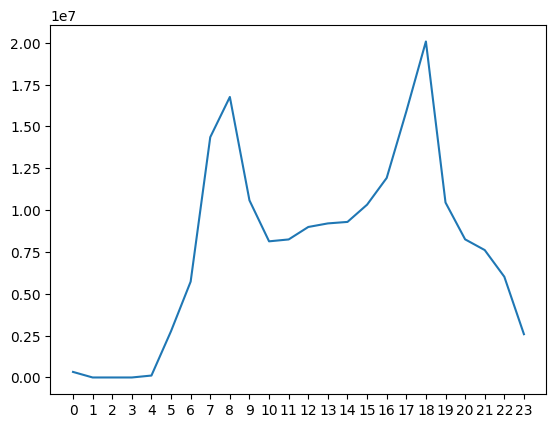

In [63]:
import matplotlib.pyplot as plt

plt.plot(cnt_per_hour.values())
plt.xticks(list(cnt_per_hour.keys()))
plt.show()